In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns 
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score


# Load datasets
train_data_normal = pd.read_csv('train_data.csv')
train_data_IF = pd.read_csv('train_data_IF.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')

# Exclude non-numeric columns
non_numeric_columns = ['Turbine_ID', 'Timestamp']
embedding_columns = [col for col in train_data_normal.columns if col.startswith('Remark_Embedding_')]
exclude_columns = non_numeric_columns + embedding_columns + ['Anomaly']

# Select numeric features
train_normal_numeric = train_data_normal.drop(columns=exclude_columns)
train_IF_numeric = train_data_IF.drop(columns=exclude_columns)
val_numeric = val_data.drop(columns=exclude_columns)
test_numeric = test_data.drop(columns=exclude_columns)

# Normalize data
scaler = StandardScaler()
train_normal_scaled = scaler.fit_transform(train_normal_numeric)
train_IF_scaled = scaler.fit_transform(train_IF_numeric)
val_scaled = scaler.transform(val_numeric)
test_scaled = scaler.transform(test_numeric)

# Convert to PyTorch tensors
train_normal_tensor = torch.tensor(train_normal_scaled, dtype=torch.float32)
train_IF_tensor = torch.tensor(train_IF_scaled, dtype=torch.float32)
val_tensor = torch.tensor(val_scaled, dtype=torch.float32)

# Create DataLoaders
batch_size = 128
train_normal_loader = DataLoader(TensorDataset(train_normal_tensor), batch_size=batch_size, shuffle=True)
train_IF_loader = DataLoader(TensorDataset(train_IF_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(val_tensor), batch_size=batch_size)





In [2]:
# Define the Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Function to apply Xavier initialization
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

# Function to train the autoencoder
def train_autoencoder(model, train_loader, val_loader, optimizer, criterion, epochs=50):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        for batch in train_loader:
            inputs = batch[0]
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                inputs = batch[0]
                outputs = model(inputs)
                loss = criterion(outputs, inputs)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))

        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

    # Plot training and validation loss
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

Training model on manually filtered data...


/home/mti850/anaconda3/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


Epoch 1/50, Training Loss: 0.0897, Validation Loss: 0.2036
Epoch 2/50, Training Loss: 0.0353, Validation Loss: 0.1235
Epoch 3/50, Training Loss: 0.0322, Validation Loss: 0.1042
Epoch 4/50, Training Loss: 0.0218, Validation Loss: 0.1851
Epoch 5/50, Training Loss: 0.0194, Validation Loss: 0.0792
Epoch 6/50, Training Loss: 0.0170, Validation Loss: 0.0818
Epoch 7/50, Training Loss: 0.0158, Validation Loss: 0.1594
Epoch 8/50, Training Loss: 0.0205, Validation Loss: 0.3125
Epoch 9/50, Training Loss: 0.0158, Validation Loss: 0.0697
Epoch 10/50, Training Loss: 0.0128, Validation Loss: 0.2630
Epoch 11/50, Training Loss: 0.0145, Validation Loss: 0.0635
Epoch 12/50, Training Loss: 0.0167, Validation Loss: 0.0605
Epoch 13/50, Training Loss: 0.0111, Validation Loss: 0.0621
Epoch 14/50, Training Loss: 0.0123, Validation Loss: 0.0772
Epoch 15/50, Training Loss: 0.0112, Validation Loss: 0.0690
Epoch 16/50, Training Loss: 0.0110, Validation Loss: 0.0569
Epoch 17/50, Training Loss: 0.0107, Validation Lo

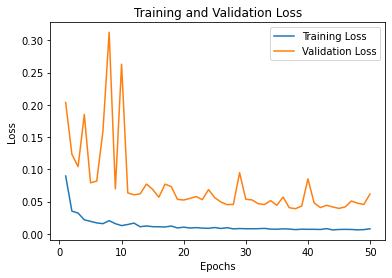

Training model on Isolation Forest filtered data...
Epoch 1/50, Training Loss: 0.1167, Validation Loss: 0.5225
Epoch 2/50, Training Loss: 0.0574, Validation Loss: 0.5121
Epoch 3/50, Training Loss: 0.0451, Validation Loss: 0.4842
Epoch 4/50, Training Loss: 0.0377, Validation Loss: 0.3665
Epoch 5/50, Training Loss: 0.0296, Validation Loss: 0.2042
Epoch 6/50, Training Loss: 0.0308, Validation Loss: 0.3450
Epoch 7/50, Training Loss: 0.0299, Validation Loss: 0.0859
Epoch 8/50, Training Loss: 0.0215, Validation Loss: 0.2120
Epoch 9/50, Training Loss: 0.0223, Validation Loss: 0.1316
Epoch 10/50, Training Loss: 0.0188, Validation Loss: 0.1906
Epoch 11/50, Training Loss: 0.0166, Validation Loss: 0.3468
Epoch 12/50, Training Loss: 0.0195, Validation Loss: 0.1649
Epoch 13/50, Training Loss: 0.0171, Validation Loss: 0.1272
Epoch 14/50, Training Loss: 0.0154, Validation Loss: 0.2955
Epoch 15/50, Training Loss: 0.0209, Validation Loss: 0.2990
Epoch 16/50, Training Loss: 0.0143, Validation Loss: 0.11

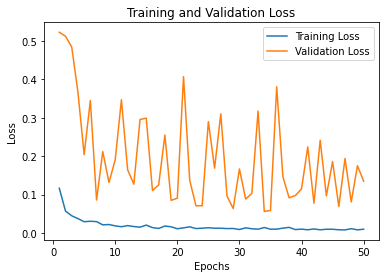

In [3]:

# Train a model on manually filtered data
print("Training model on manually filtered data...")
input_dim = train_normal_numeric.shape[1]
model_normal = Autoencoder(input_dim)
model_normal.apply(weights_init)
optimizer_normal = torch.optim.Adam(model_normal.parameters(), lr=0.001)
criterion = nn.MSELoss()
train_autoencoder(model_normal, train_normal_loader, val_loader, optimizer_normal, criterion)

# Train a model on Isolation Forest filtered data
print("Training model on Isolation Forest filtered data...")
model_IF = Autoencoder(input_dim)
model_IF.apply(weights_init)
optimizer_IF = torch.optim.Adam(model_IF.parameters(), lr=0.001)
train_autoencoder(model_IF, train_IF_loader, val_loader, optimizer_IF, criterion)

Evaluating model trained on manually filtered data...


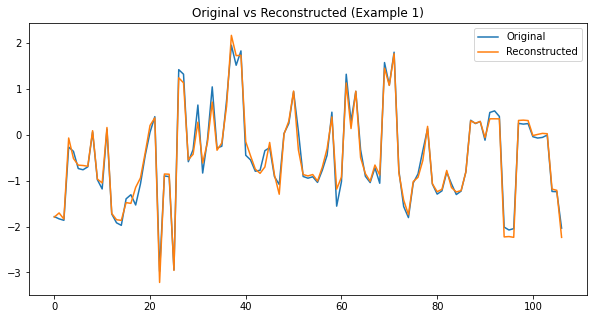

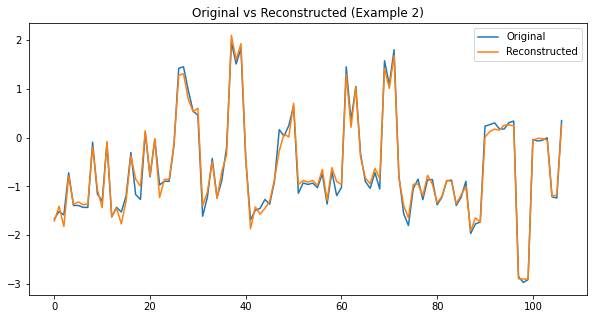

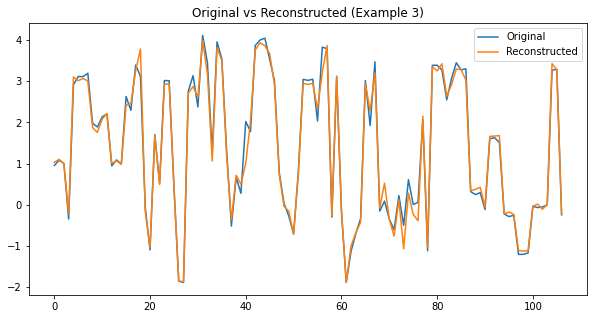

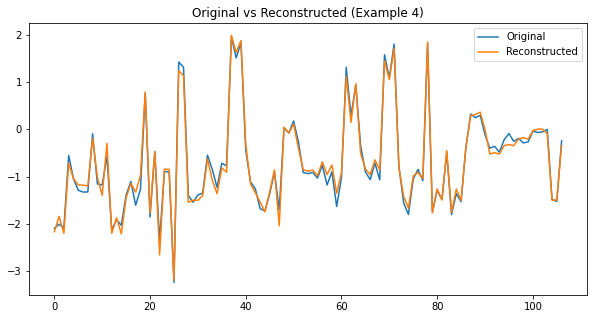

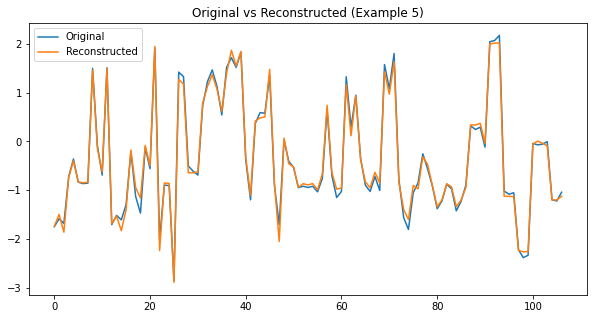

Evaluating model trained on Isolation Forest filtered data...


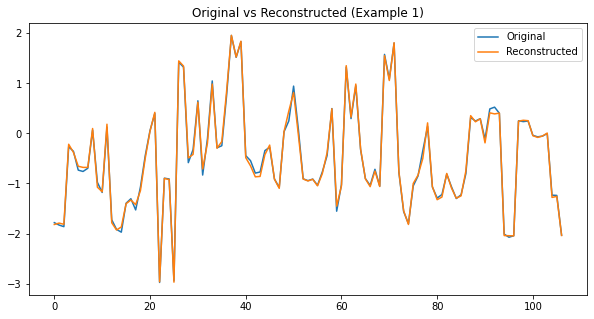

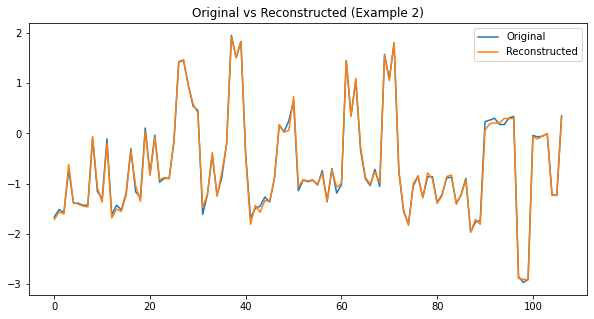

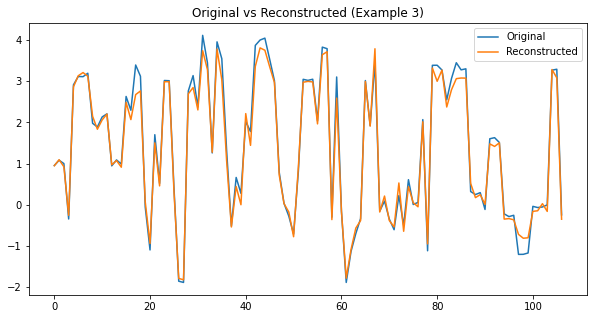

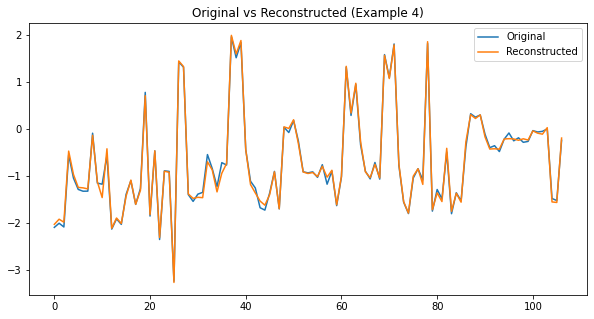

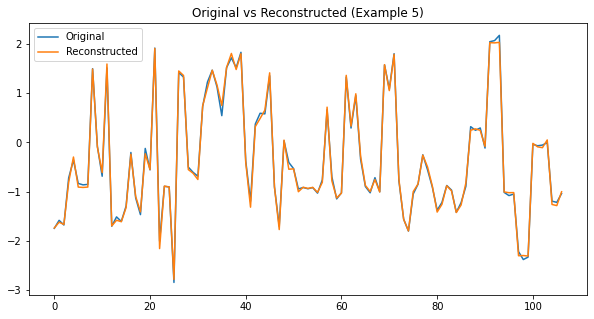

In [4]:
# Evaluate models and visualize reconstruction

def evaluate_model(model, data_tensor, num_examples=5):
    model.eval()
    with torch.no_grad():
        outputs = model(data_tensor).numpy()
        reconstructions = outputs[:num_examples]
        originals = data_tensor.numpy()[:num_examples]

    # Plot original vs reconstructed for the first example
    for i in range(num_examples):
        plt.figure(figsize=(10, 5))
        plt.plot(originals[i], label='Original')
        plt.plot(reconstructions[i], label='Reconstructed')
        plt.legend()
        plt.title(f"Original vs Reconstructed (Example {i + 1})")
        plt.show()

# Evaluate and visualize results for manually filtered model
print("Evaluating model trained on manually filtered data...")
evaluate_model(model_normal, val_tensor)

# Evaluate and visualize results for Isolation Forest filtered model
print("Evaluating model trained on Isolation Forest filtered data...")
evaluate_model(model_IF, val_tensor)


In [5]:
def inject_anomalies(data, anomaly_fraction=0.1, noise_factor=2.0):
    """
    Inject synthetic anomalies into the data by adding noise to random rows.

    Parameters:
        data (numpy array): The input data array.
        anomaly_fraction (float): Fraction of data to be perturbed as anomalies.
        noise_factor (float): Intensity of the noise to be added.

    Returns:
        numpy array: Data with injected anomalies.
        numpy array: Labels for the new data (1 for anomalies, 0 for normal).
    """
    num_anomalies = int(len(data) * anomaly_fraction)
    anomaly_indices = np.random.choice(len(data), num_anomalies, replace=False)

    # Inject noise into selected rows to simulate anomalies
    data_with_anomalies = data.copy()
    data_with_anomalies[anomaly_indices] += noise_factor * np.random.normal(0, 1, data.shape[1])

    # Create anomaly labels: 1 for anomalies, 0 for normal
    labels = np.zeros(len(data))
    labels[anomaly_indices] = 1

    return data_with_anomalies, labels

# Prepare testing data with anomalies
test_numeric = test_data.drop(columns=exclude_columns)
test_scaled = scaler.transform(test_numeric)

test_with_anomalies, test_labels = inject_anomalies(test_scaled, anomaly_fraction=0.1, noise_factor=2.0)
test_tensor = torch.tensor(test_with_anomalies, dtype=torch.float32)


In [6]:
def compute_reconstruction_error(model, data_tensor):
    model.eval()
    with torch.no_grad():
        outputs = model(data_tensor).numpy()
    reconstruction_error = np.mean((data_tensor.numpy() - outputs) ** 2, axis=1)
    return reconstruction_error

# Compute reconstruction errors on validation set
val_recon_error_normal = compute_reconstruction_error(model_normal, val_tensor)
val_recon_error_IF = compute_reconstruction_error(model_IF, val_tensor)

# Determine thresholds (e.g., 95th percentile)
threshold_normal = np.percentile(val_recon_error_normal, 95)
threshold_IF = np.percentile(val_recon_error_IF, 95)

print(f"Threshold (Manual Model): {threshold_normal:.4f}")
print(f"Threshold (IF Model): {threshold_IF:.4f}")


Threshold (Manual Model): 0.0771
Threshold (IF Model): 0.0923


In [7]:
# Compute reconstruction errors for the test set
test_errors_normal = compute_reconstruction_error(model_normal, test_tensor)
test_errors_IF = compute_reconstruction_error(model_IF, test_tensor)

# Classify anomalies based on thresholds
pred_labels_normal = (test_errors_normal > threshold_normal).astype(int)
pred_labels_IF = (test_errors_IF > threshold_IF).astype(int)


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate Manual Model
precision_normal = precision_score(test_labels, pred_labels_normal)
recall_normal = recall_score(test_labels, pred_labels_normal)
f1_normal = f1_score(test_labels, pred_labels_normal)

print("\nManual Model Performance on Test Data:")
print(f"Precision: {precision_normal:.4f}, Recall: {recall_normal:.4f}, F1-Score: {f1_normal:.4f}")

# Evaluate IF Model
precision_IF = precision_score(test_labels, pred_labels_IF)
recall_IF = recall_score(test_labels, pred_labels_IF)
f1_IF = f1_score(test_labels, pred_labels_IF)

print("\nIsolation Forest Model Performance on Test Data:")
print(f"Precision: {precision_IF:.4f}, Recall: {recall_IF:.4f}, F1-Score: {f1_IF:.4f}")



Manual Model Performance on Test Data:
Precision: 0.6847, Recall: 1.0000, F1-Score: 0.8129

Isolation Forest Model Performance on Test Data:
Precision: 0.6815, Recall: 1.0000, F1-Score: 0.8106


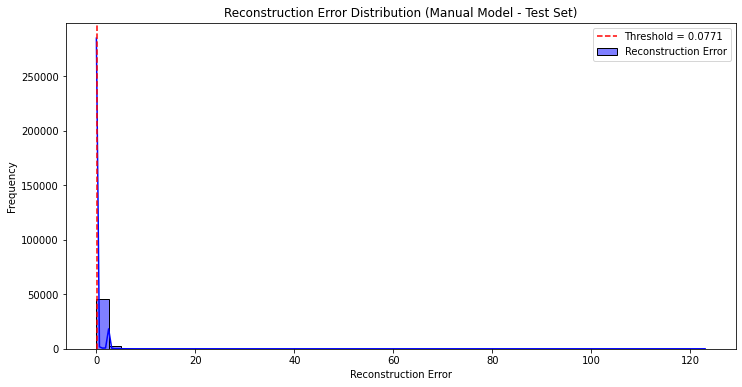

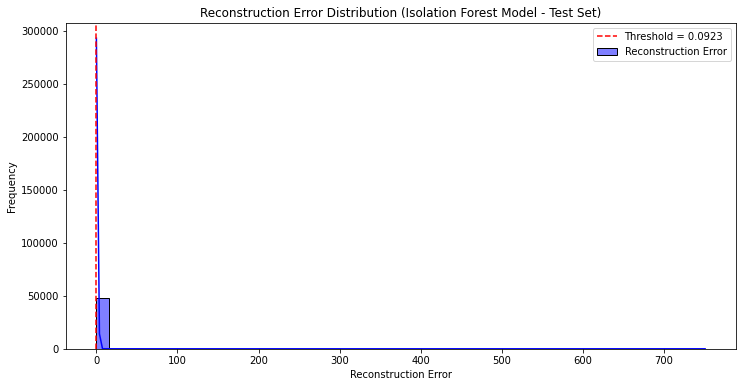

In [9]:
def plot_error_distribution(errors, threshold, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(errors, bins=50, kde=True, color='blue', label='Reconstruction Error')
    plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
    plt.title(title)
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot for Manual Model
plot_error_distribution(test_errors_normal, threshold_normal, "Reconstruction Error Distribution (Manual Model - Test Set)")

# Plot for IF Model
plot_error_distribution(test_errors_IF, threshold_IF, "Reconstruction Error Distribution (Isolation Forest Model - Test Set)")


In [10]:
# Identify misclassified points
false_positives_normal = np.where((pred_labels_normal == 1) & (test_labels == 0))[0]
false_negatives_normal = np.where((pred_labels_normal == 0) & (test_labels == 1))[0]

false_positives_IF = np.where((pred_labels_IF == 1) & (test_labels == 0))[0]
false_negatives_IF = np.where((pred_labels_IF == 0) & (test_labels == 1))[0]

print(f"\nManual Model: False Positives: {len(false_positives_normal)}, False Negatives: {len(false_negatives_normal)}")
print(f"IF Model: False Positives: {len(false_positives_IF)}, False Negatives: {len(false_negatives_IF)}")



Manual Model: False Positives: 2215, False Negatives: 0
IF Model: False Positives: 2248, False Negatives: 0


In [11]:
import joblib

# Save models
torch.save(model_normal.state_dict(), 'autoencoder_manual_model.pth')
torch.save(model_IF.state_dict(), 'autoencoder_IF_model.pth')

# Save thresholds
thresholds = {
    'manual': threshold_normal,
    'IF': threshold_IF
}
joblib.dump(thresholds, 'reconstruction_thresholds.pkl')

print("Models and thresholds saved successfully.")


Models and thresholds saved successfully.
